# Visualización de errores

Para cualquier medición científica, la contabilidad precisa de los errores es casi tan importante, si no más, que el informe preciso del número en sí.
Por ejemplo, imagina que estoy usando algunas observaciones astrofísicas para estimar la constante de Hubble, la medida local de la tasa de expansión del Universo.
Sé que la literatura actual sugiere un valor de alrededor de 71 (km/s)/Mpc, y mido un valor de 74 (km/s)/Mpc con mi método. ¿Son consistentes los valores? La única respuesta correcta, dada esta información, es esta: no hay forma de saberlo.
Supongamos que amplío esta información con las incertidumbres reportadas: la literatura actual sugiere un valor de alrededor de 71 $\pm$ 2.5 (km/s)/Mpc, y mi método ha medido un valor de 74 $\pm$ 5 (km/s) /Mpc. Ahora, ¿los valores son consistentes? Esa es una pregunta que puede ser respondida cuantitativamente.
En la visualización de datos y resultados, mostrar estos errores de manera efectiva puede hacer que un gráfico transmita información mucho más completa.

## Barras de error básicas
Se puede crear una barra de error básica con una sola llamada a la función Matplotlib:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

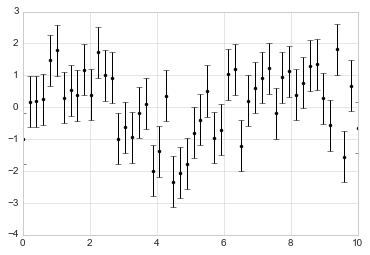

In [ ]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

Aquí ``fmt`` es un código de formato que controla la apariencia de líneas y puntos, y tiene la misma sintaxis que la abreviatura utilizada en ``plt.plot``, descrita en [Gráficos lineales simples](04.01-Gráficos-lineales-simples.ipynb) y [Gráficos de dispersión simples](04.02-Gráficos-de-dispersión-simples.ipynb).
Además de estas opciones básicas, la función ``errorbar`` tiene muchas opciones para ajustar las salidas.
Con estas opciones adicionales, puede personalizar fácilmente la estética de su gráfico de barra de error.
A menudo encuentro útil, especialmente en parcelas abarrotadas, hacer que las barras de error sean más claras que los puntos mismos:

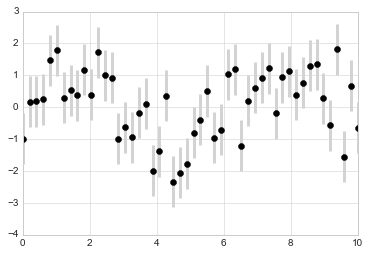

In [ ]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

Además de estas opciones, también puede especificar barras de error horizontales (``xerr``), barras de error de un solo lado y muchas otras variantes.
Para obtener más información sobre las opciones disponibles, consulte la cadena de documentación de ``plt.errorbar``.

## Errores continuos
En algunas situaciones es deseable mostrar barras de error en cantidades continuas.
Aunque Matplotlib no tiene una rutina de conveniencia incorporada para este tipo de aplicación, es relativamente fácil combinar primitivas como ``plt.plot`` y ``plt.fill_ between`` para obtener un resultado útil.
Aquí realizaremos una simple *regresión de proceso gaussiano*, utilizando la API de Scikit-Learn (consulte [Introducción a Scikit-Learn](05.02-Introducción-a-Scikit-Learn.ipynb) para obtener más información).
Este es un método para ajustar una función no paramétrica muy flexible a los datos con una medida continua de la incertidumbre.
No profundizaremos en los detalles de la regresión del proceso gaussiano en este punto, sino que nos centraremos en cómo puede visualizar una medición de error continua de este tipo:

In [ ]:
from sklearn.gaussian_process import GaussianProcess

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1,
                     random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)  # 2*sigma ~ 95% confidence region

Ahora tenemos ``xfit``, ``yfit`` y ``dyfit``, que muestran el ajuste continuo a nuestros datos.
Podríamos pasarlos a la función ``plt.errorbar`` como se indicó anteriormente, pero en realidad no queremos trazar 1000 puntos con 1000 barras de error.
En su lugar, podemos usar la función ``plt.fill_ between`` con un color claro para visualizar este error continuo:

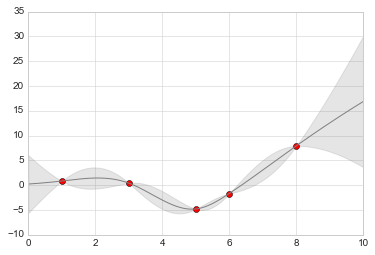

In [ ]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

Tenga en cuenta lo que hemos hecho aquí con la función ``llenar_entre``: pasamos un valor x, luego el límite inferior de y, luego el límite superior de y, y el resultado es que el área entre estas regiones está llena.
La figura resultante brinda una visión muy intuitiva de lo que está haciendo el algoritmo de regresión del proceso gaussiano: en las regiones cercanas a un punto de datos medido, el modelo está fuertemente restringido y esto se refleja en los pequeños errores del modelo.
En regiones alejadas de un punto de datos medido, el modelo no está fuertemente restringido y los errores del modelo aumentan.
Para obtener más información sobre las opciones disponibles en ``plt.fill_ between()`` (y la función ``plt.fill()`` estrechamente relacionada), consulte la documentación de la función o la documentación de Matplotlib.
Finalmente, si esto parece un nivel demasiado bajo para su gusto, consulte [Visualización con Seaborn](04.14-Visualización-con-Seaborn.ipynb), donde analizamos el paquete Seaborn, que tiene una API más optimizada para visualizar este tipo de barra de error continua.